# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings


In [3]:
# Import the libraries you will be using for analysis

warnings.filterwarnings('ignore')

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [11]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
# df.info()

In [15]:
df.info()
row_count=len(df)
print('Number of rows are ',row_count)

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [19]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('data')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        file_df=pd.read_parquet(file_path)
        file_df['tpep_pickup_datetime']=pd.to_datetime(file_df['tpep_pickup_datetime'])
        file_df['pickup_date']=file_df['tpep_pickup_datetime'].dt.date
        file_df['pickup_hour']=file_df['tpep_pickup_datetime'].dt.hour
       
       
        # Reading the current file



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        sampled_data=(
            file_df.groupby(['pickup_date','pickup_hour'],group_keys=False).apply(lambda x:x.sample(frac=0.05))
        )
        print(f'Sampled data has {len(sampled_data)} rows')
        
        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df=pd.concat([df,sampled_data],ignore_index=True)
        print(f'Total dataframe has {len(df)} rows')

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
df.to_parquet('final_samled_data.parquet')        

Sampled data has 152087 rows
Total dataframe has 152087 rows
Sampled data has 174255 rows
Total dataframe has 326342 rows
Sampled data has 165133 rows
Total dataframe has 491475 rows
Sampled data has 166709 rows
Total dataframe has 658184 rows
Sampled data has 168696 rows
Total dataframe has 826880 rows
Sampled data has 163786 rows
Total dataframe has 990666 rows
Sampled data has 139641 rows
Total dataframe has 1130307 rows
Sampled data has 144458 rows
Total dataframe has 1274765 rows
Sampled data has 162910 rows
Total dataframe has 1437675 rows
Sampled data has 174068 rows
Total dataframe has 1611743 rows
Sampled data has 143782 rows
Total dataframe has 1755525 rows
Sampled data has 140875 rows
Total dataframe has 1896400 rows


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [21]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet('final_sampled_data.parquet') 

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file



In [23]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:59:48   2023-01-01 00:00:47              1.0   
1         1  2023-01-01 00:49:49   2023-01-01 01:11:18              1.0   
2         2  2023-01-01 00:13:06   2023-01-01 00:18:32              1.0   
3         2  2023-01-01 00:40:19   2023-01-01 01:03:17              1.0   
4         1  2023-01-01 00:53:25   2023-01-01 01:21:41              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.38         1.0                  N           140           141   
1           4.00         1.0                  N            79           236   
2           1.17         1.0                  N            90            68   
3           4.84         1.0                  N           249           236   
4           3.80         1.0                  N            90           263   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        1.74           0.0   
1             2  ...      0.5        0.00           0.0   
2             1  ...      0.5        2.58           0.0   
3             1  ...      0.5        6.08           0.0   
4             1  ...      0.5        5.80           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         10.44                   2.5          0.0   
1                    1.0         26.20                   2.5          0.0   
2                    1.0         15.48                   2.5          0.0   
3                    1.0         36.48                   2.5          0.0   
4                    1.0         34.80                   2.5          0.0   

   pickup_date  pickup_hour Airport_fee  
0   2022-12-31           23         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [27]:
# Fix the index and drop any columns that are not needed

df=df.reset_index(drop=True)

In [29]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:59:48   2023-01-01 00:00:47              1.0   
1         1  2023-01-01 00:49:49   2023-01-01 01:11:18              1.0   
2         2  2023-01-01 00:13:06   2023-01-01 00:18:32              1.0   
3         2  2023-01-01 00:40:19   2023-01-01 01:03:17              1.0   
4         1  2023-01-01 00:53:25   2023-01-01 01:21:41              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.38         1.0                  N           140           141   
1           4.00         1.0                  N            79           236   
2           1.17         1.0                  N            90            68   
3           4.84         1.0                  N           249           236   
4           3.80         1.0                  N            90           263   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        1.74           0.0   
1             2  ...      0.5        0.00           0.0   
2             1  ...      0.5        2.58           0.0   
3             1  ...      0.5        6.08           0.0   
4             1  ...      0.5        5.80           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         10.44                   2.5          0.0   
1                    1.0         26.20                   2.5          0.0   
2                    1.0         15.48                   2.5          0.0   
3                    1.0         36.48                   2.5          0.0   
4                    1.0         34.80                   2.5          0.0   

   pickup_date  pickup_hour Airport_fee  
0   2022-12-31           23         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [31]:
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896400e+06                     1896400                     1896400   
mean   1.735993e+00  2023-07-02 19:59:52.033406  2023-07-02 20:17:23.764196   
min    1.000000e+00         2022-12-31 23:59:48         2023-01-01 00:00:47   
25%    1.000000e+00  2023-04-02 16:11:53.500000         2023-04-02 16:30:57   
50%    2.000000e+00  2023-06-27 15:46:51.500000  2023-06-27 16:06:54.500000   
75%    2.000000e+00  2023-10-06 19:42:03.750000  2023-10-06 19:59:31.250000   
max    6.000000e+00         2023-12-31 23:59:59         2024-01-01 22:05:10   
std    4.466146e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.830980e+06   1.896400e+06  1.830980e+06  1.896400e+06   
mean      1.369775e+00   4.112217e+00  1.647756e+00  1.652016e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.040000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.800000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.891432e+05  9.900000e+01  2.650000e+02   
std       8.925455e-01   2.201293e+02  7.471348e+00  6.398957e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.640991e+02  1.163112e+00  1.990733e+01  1.581567e+00  4.952198e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -5.000000e-01   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.236000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.968750e+03  9.638000e+01  4.000000e+00   
std    6.981508e+01  5.083315e-01  1.845981e+01  1.829528e+00  4.905552e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.896400e+06  1.896400e+06           1.896400e+06  1.896400e+06   
mean   3.555693e+00  6.016575e-01           9.989636e-01  2.898642e+01   
min    0.000000e+00  0.000000e+00          -1.000000e+00 -5.750000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.450000e+00  0.000000e+00           1.000000e+00  3.100000e+01   
max    4.100000e+02  1.110000e+02           1.000000e+00  1.968750e+03   
std    4.086785e+00  2.191207e+00           3.155554e-02  2.301510e+01   

       congestion_surcharge    airport_fee   pickup_hour   Airport_fee  
count          1.830980e+06  148493.000000  1.896400e+06  1.682487e+06  
mean           2.309024e+00       0.111394  1.426504e+01  1.465265e-01  
min           -2.500000e+00      -1.250000  0.000000e+00 -1.750000e+00  
25%            2.500000e+00       0.000000  1.100000e+01  0.000000e+00  
50%            2.500000e+00       0.000000  1.500000e+01  0.000000e+00  
75%            2.500000e+00       0.000000  1.900000e+01  0.000000e+00  
max            2.500000e+00       1.250000  2.300000e+01  1.750000e+00  
std            6.643828e-01       0.356168  5.807381e+00  4.743603e-01

In [35]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
pickup_date                      object
pickup_hour                       int32
Airport_fee                     float64
dtype: object

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [41]:
# Combine the two airport fee columns
df['airport_fee'].isna().sum()

1747907

In [43]:
df['Airport_fee'].isna().sum()

213913

In [45]:
df['airport_fee']=df['Airport_fee'].fillna(df['airport_fee'].fillna(0))

In [47]:
df['airport_fee'].isna().sum()

0

In [51]:
df=df.drop('Airport_fee',axis=1)

KeyError: "['Airport_fee'] not found in axis"

In [55]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:59:48   2023-01-01 00:00:47              1.0   
1         1  2023-01-01 00:49:49   2023-01-01 01:11:18              1.0   
2         2  2023-01-01 00:13:06   2023-01-01 00:18:32              1.0   
3         2  2023-01-01 00:40:19   2023-01-01 01:03:17              1.0   
4         1  2023-01-01 00:53:25   2023-01-01 01:21:41              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.38         1.0                  N           140           141   
1           4.00         1.0                  N            79           236   
2           1.17         1.0                  N            90            68   
3           4.84         1.0                  N           249           236   
4           3.80         1.0                  N            90           263   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...    1.0      0.5        1.74           0.0   
1             2  ...    3.5      0.5        0.00           0.0   
2             1  ...    1.0      0.5        2.58           0.0   
3             1  ...    1.0      0.5        6.08           0.0   
4             1  ...    3.5      0.5        5.80           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         10.44                   2.5          0.0   
1                    1.0         26.20                   2.5          0.0   
2                    1.0         15.48                   2.5          0.0   
3                    1.0         36.48                   2.5          0.0   
4                    1.0         34.80                   2.5          0.0   

   pickup_date pickup_hour  
0   2022-12-31          23  
1   2023-01-01           0  
2   2023-01-01           0  
3   2023-01-01           0  
4   2023-01-01           0  

[5 rows x 21 columns]

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [57]:
# check where values of fare amount are negative
negative_mask=df['total_amount']<0


In [59]:
negative_records=df.loc[negative_mask].copy()

Did you notice something different in the `RatecodeID` column for above records?

In [61]:
# Analyse RatecodeID for the negative fare amounts
negative_records['RatecodeID'].value_counts()


RatecodeID
1.0    61
2.0    25
5.0     7
3.0     1
4.0     1
Name: count, dtype: int64

In [65]:
# Find which columns have negative values
numeric_cols = df.select_dtypes(include=['number'])

In [67]:
# fix these negative values
print(numeric_cols)


         VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
0               2              1.0           0.38         1.0           140   
1               1              1.0           4.00         1.0            79   
2               2              1.0           1.17         1.0            90   
3               2              1.0           4.84         1.0           249   
4               1              2.0           3.80         1.0            90   
...           ...              ...            ...         ...           ...   
1896395         2              1.0          10.06         1.0           161   
1896396         1              NaN           0.00         NaN           142   
1896397         2              1.0           0.93         1.0           231   
1896398         2              1.0           1.80         1.0           144   
1896399         2              1.0          12.42         1.0           132   

         DOLocationID  payment_type  fare_amount  e

In [69]:
negative_columns = numeric_cols.columns[(numeric_cols < 0).any()].tolist()

In [71]:
print("Columns with negative values:", negative_columns)

Columns with negative values: ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [73]:
# Find the proportion of missing values in each column

missing_proportion = df.isnull().mean() * 100 

In [75]:
print(missing_proportion)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.449694
trip_distance            0.000000
RatecodeID               3.449694
store_and_fwd_flag       3.449694
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.449694
airport_fee              0.000000
pickup_date              0.000000
pickup_hour              0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [77]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace=True)

Did you find zeroes in passenger_count? Handle these.

In [79]:
df['passenger_count'].value_counts()

passenger_count
1.0    1442167
2.0     277948
3.0      68547
4.0      38773
0.0      29196
5.0      23991
6.0      15762
8.0         12
9.0          2
7.0          2
Name: count, dtype: int64

In [83]:
mode_value = df.loc[df['passenger_count'] > 0, 'passenger_count'].mode()[0]

In [85]:
df['passenger_count'] = df['passenger_count'].replace(0, mode_value)

In [87]:
df['passenger_count'].value_counts()

passenger_count
1.0    1471363
2.0     277948
3.0      68547
4.0      38773
5.0      23991
6.0      15762
8.0         12
9.0          2
7.0          2
Name: count, dtype: int64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [89]:
# Fix missing values in 'RatecodeID'
mode_value = df['RatecodeID'].mode()[0]
df['RatecodeID'].fillna(mode_value, inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [91]:
df['congestion_surcharge'].fillna(0, inplace=True)

In [ ]:
# handle null values in congestion_surcharge




Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [93]:
# Handle any remaining missing values
missing_proportion = df.isnull().mean() * 100 


In [95]:
print(missing_proportion)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
store_and_fwd_flag       3.449694
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
airport_fee              0.000000
pickup_date              0.000000
pickup_hour              0.000000
dtype: float64


In [97]:
df['store_and_fwd_flag'].fillna('N', inplace=True)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

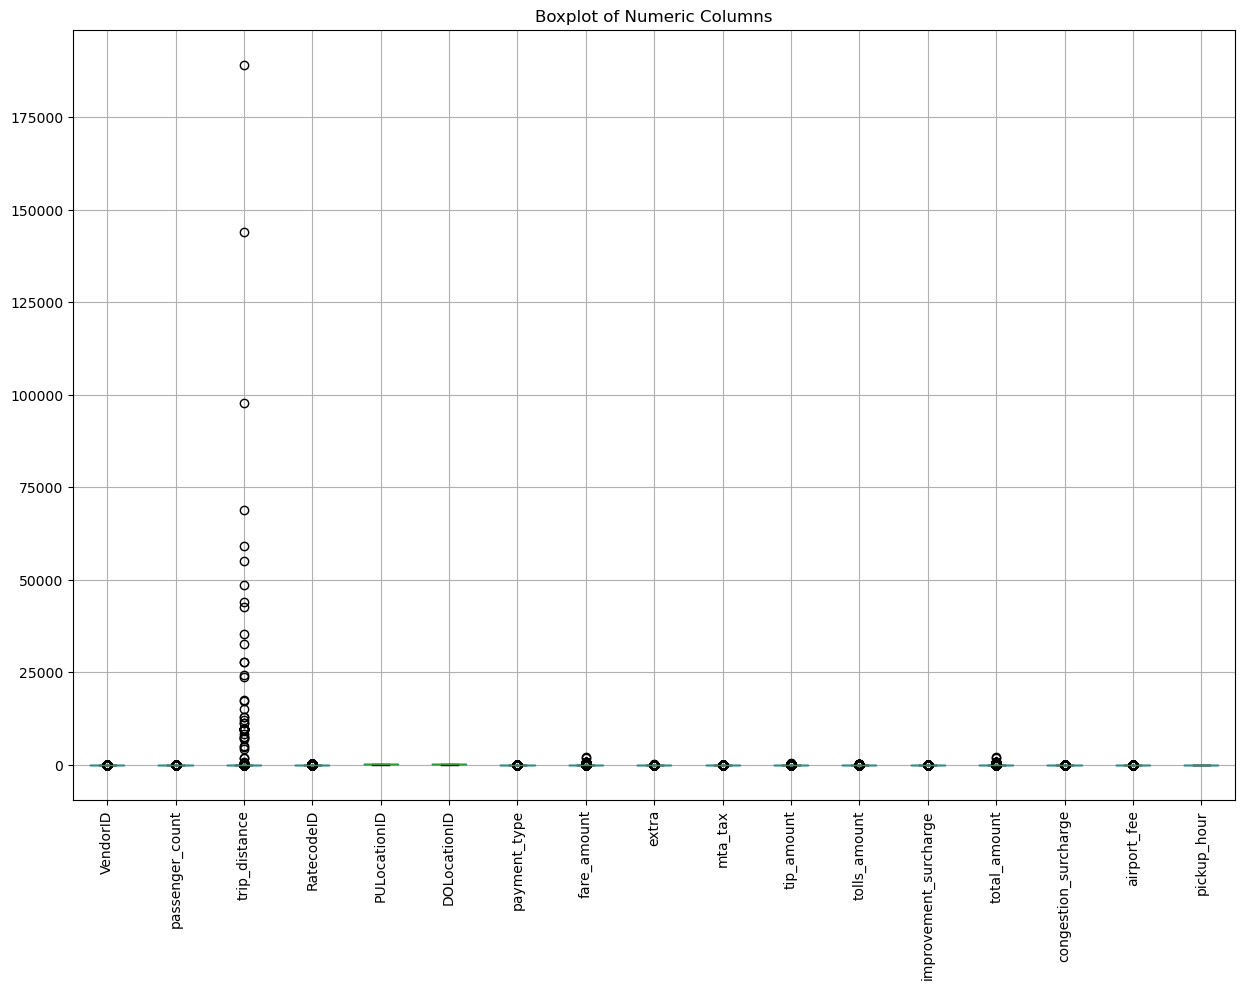

In [99]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
df[numeric_cols].boxplot(rot=90)  
plt.title("Boxplot of Numeric Columns")
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [101]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
df.reset_index(drop=True, inplace=True)

In [103]:
# Continue with outlier handling
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]
df = df[df['trip_distance'] <= 250]
df = df[df['payment_type'] > 0]
df.reset_index(drop=True, inplace=True)



In [ ]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [ ]:
Categorical Variables 
VendorID 
RatecodeID 
PULocationID 
DOLocationID 
payment_type 


Numerical Variables
passenger_count 
trip_distance 
trip_duration 
pickup_hour 
Monetary Variables
fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount
congestion_surcharge
airport_fee


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

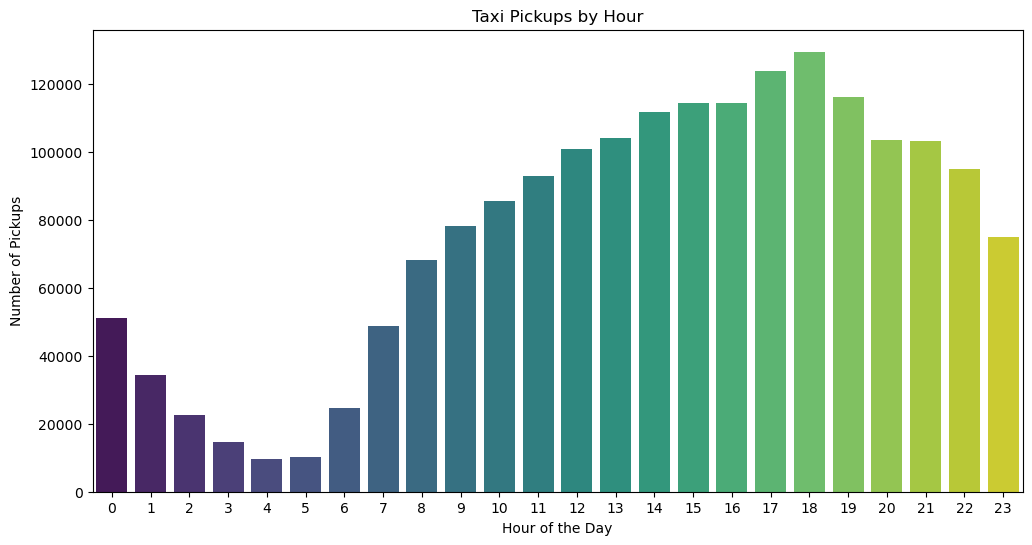

In [107]:
# Find and show the hourly trends in taxi pickups
df.head()
plt.figure(figsize=(12, 6))
sns.countplot(x=df['pickup_hour'], palette="viridis")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Taxi Pickups by Hour")
plt.xticks(range(24))
plt.show()

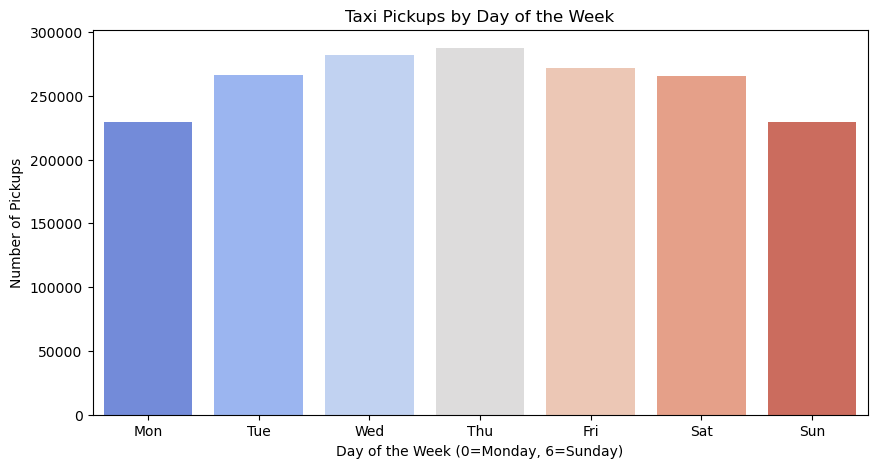

In [111]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek 
plt.figure(figsize=(10, 5))
sns.countplot(x=df['pickup_day'], palette="coolwarm")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Number of Pickups")
plt.title("Taxi Pickups by Day of the Week")
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


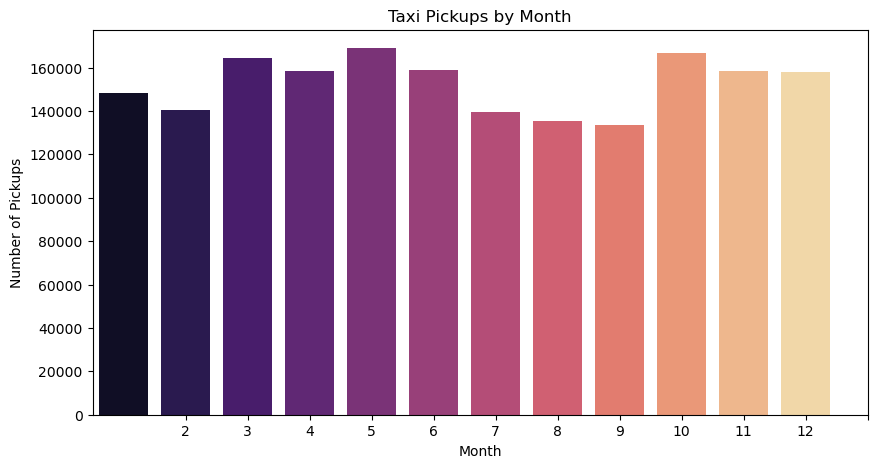

In [113]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
plt.figure(figsize=(10, 5))
sns.countplot(x=df['pickup_month'], palette="magma")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Taxi Pickups by Month")
plt.xticks(range(1, 13))
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [115]:
# Analyse the above parameters
cols_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
zero_values = (df[cols_to_check] == 0).sum()
negative_values = (df[cols_to_check] < 0).sum()
print("Zero Values:\n", zero_values)
print("\nNegative Values:\n", negative_values)


Zero Values:
 fare_amount         548
tip_amount       408573
total_amount        237
trip_distance     22148
dtype: int64

Negative Values:
 fare_amount       0
tip_amount        0
total_amount     94
trip_distance     0
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [117]:
# Create a df with non zero entries for the selected parameters.
cols_to_filter = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df_non_zero = df[(df[cols_to_filter] != 0).all(axis=1)]
print(f"Original DataFrame shape: {df.shape}")
print(f"Filtered DataFrame shape: {df_non_zero.shape}")
df_non_zero.head()



Original DataFrame shape: (1830837, 23)
Filtered DataFrame shape: (1413882, 23)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:59:48   2023-01-01 00:00:47              1.0   
2         2  2023-01-01 00:13:06   2023-01-01 00:18:32              1.0   
3         2  2023-01-01 00:40:19   2023-01-01 01:03:17              1.0   
4         1  2023-01-01 00:53:25   2023-01-01 01:21:41              2.0   
5         2  2023-01-01 00:55:53   2023-01-01 01:16:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.38         1.0                  N           140           141   
2           1.17         1.0                  N            90            68   
3           4.84         1.0                  N           249           236   
4           3.80         1.0                  N            90           263   
5           3.13         1.0                  N           161           148   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0             1  ...        1.74           0.0                    1.0   
2             1  ...        2.58           0.0                    1.0   
3             1  ...        6.08           0.0                    1.0   
4             1  ...        5.80           0.0                    1.0   
5             1  ...        4.00           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee  pickup_date  pickup_hour  \
0         10.44                   2.5          0.0   2022-12-31           23   
2         15.48                   2.5          0.0   2023-01-01            0   
3         36.48                   2.5          0.0   2023-01-01            0   
4         34.80                   2.5          0.0   2023-01-01            0   
5         28.80                   2.5          0.0   2023-01-01            0   

   pickup_day pickup_month  
0           5           12  
2           6            1  
3           6            1  
4           6            1  
5           6            1  

[5 rows x 23 columns]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

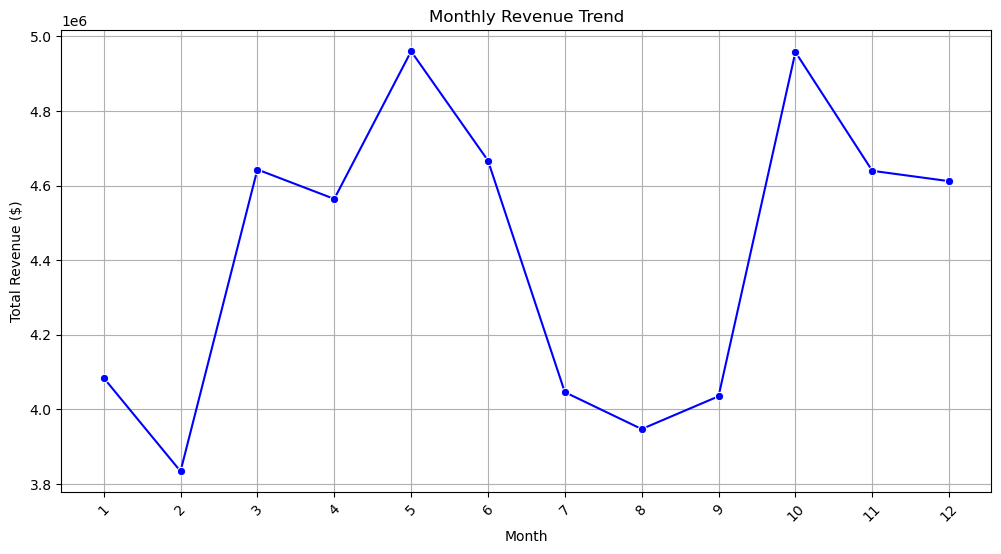

In [119]:
# Group data by month and analyse monthly revenue
# Aggregate total revenue per month
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().reset_index()

# Convert period to datetime for proper plotting
monthly_revenue['pickup_month'] = monthly_revenue['pickup_month'].astype(str)

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='pickup_month', y='total_amount', marker='o', color='b')
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.grid()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

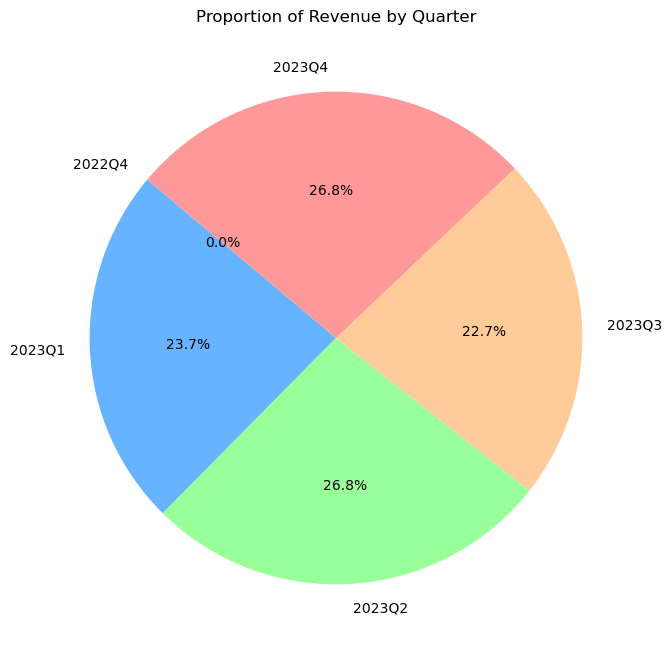

In [121]:
# Calculate proportion of each quarter
df['quarter'] = df['tpep_pickup_datetime'].dt.to_period("Q")

# Aggregate total revenue per quarter
quarterly_revenue = df.groupby('quarter')['total_amount'].sum().reset_index()

# Convert period to string for visualization
quarterly_revenue['quarter'] = quarterly_revenue['quarter'].astype(str)

# Calculate proportion
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / quarterly_revenue['total_amount'].sum()

# Plot as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(quarterly_revenue['proportion'], labels=quarterly_revenue['quarter'], autopct='%1.1f%%', 
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], startangle=140)
plt.title("Proportion of Revenue by Quarter")
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

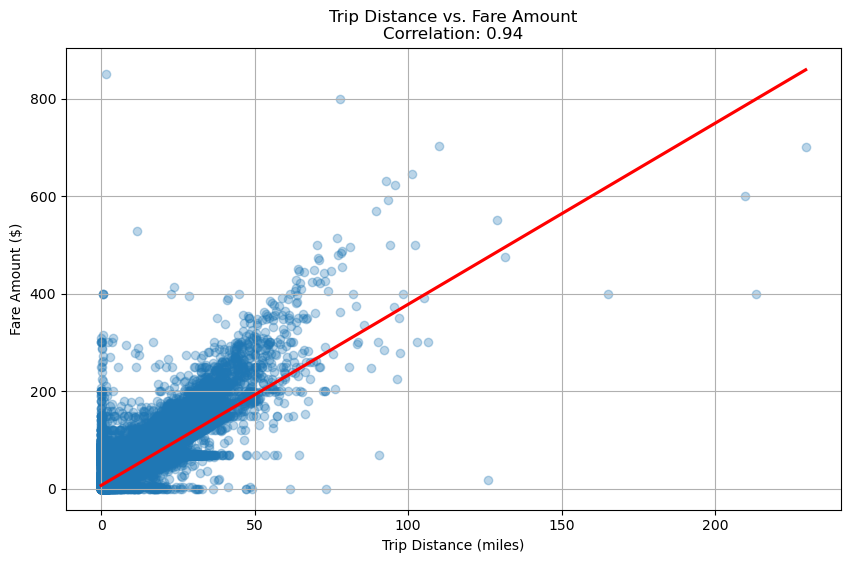

Correlation coefficient: 0.94


In [123]:
df_valid = df[df['trip_distance'] > 0]
correlation = df_valid['trip_distance'].corr(df_valid['fare_amount'])
plt.figure(figsize=(10, 6))
sns.regplot(x='trip_distance', y='fare_amount', data=df_valid, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title(f"Trip Distance vs. Fare Amount\nCorrelation: {correlation:.2f}")
plt.grid()
plt.show()
print(f"Correlation coefficient: {correlation:.2f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

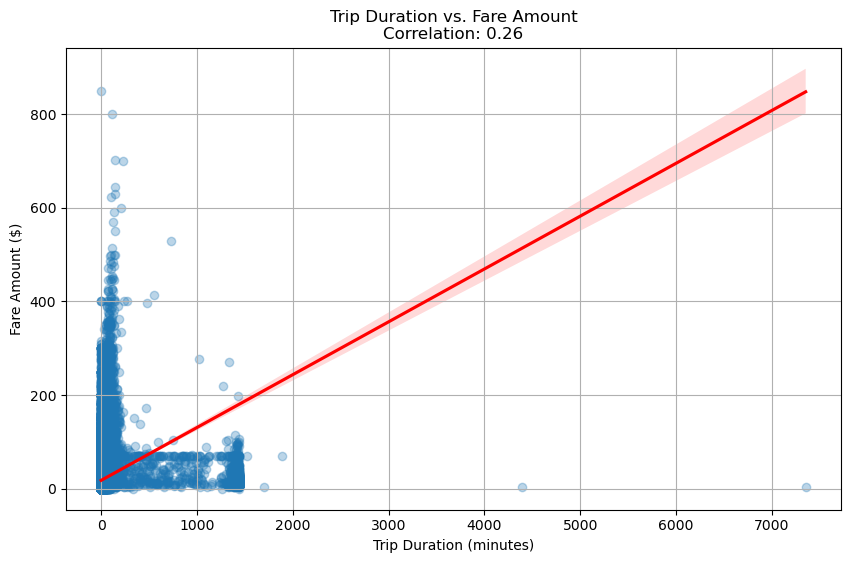

Correlation coefficient: 0.26


In [125]:
# Show relationship between fare and trip duration
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df_valid = df[df['trip_duration'] > 0]
correlation = df_valid['trip_duration'].corr(df_valid['fare_amount'])
plt.figure(figsize=(10, 6))
sns.regplot(x='trip_duration', y='fare_amount', data=df_valid, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.title(f"Trip Duration vs. Fare Amount\nCorrelation: {correlation:.2f}")
plt.grid()
plt.show()
print(f"Correlation coefficient: {correlation:.2f}")


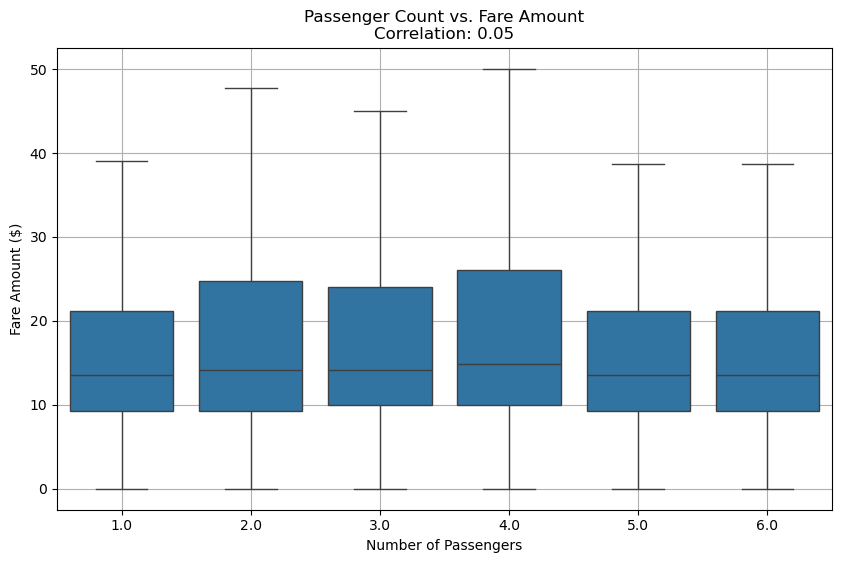

Correlation coefficient: 0.05


In [127]:
# Show relationship between fare and number of passengers

df_valid = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]
correlation = df_valid['passenger_count'].corr(df_valid['fare_amount'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df_valid, showfliers=False)
plt.xlabel("Number of Passengers")
plt.ylabel("Fare Amount ($)")
plt.title(f"Passenger Count vs. Fare Amount\nCorrelation: {correlation:.2f}")
plt.grid()
plt.show()
print(f"Correlation coefficient: {correlation:.2f}")


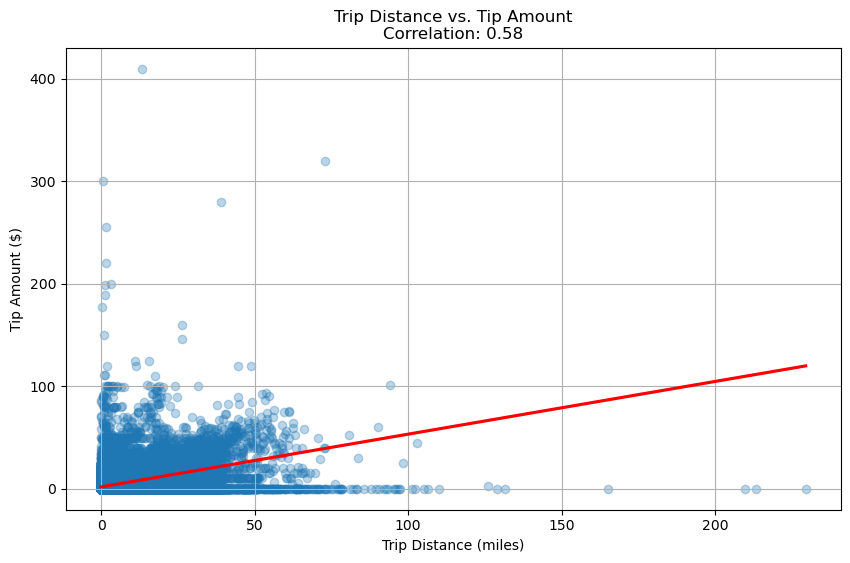

Correlation coefficient: 0.58


In [129]:
# Show relationship between tip and trip distance
df_valid = df[(df['trip_distance'] > 0) & (df['tip_amount'] >= 0)]
correlation = df_valid['trip_distance'].corr(df_valid['tip_amount'])
plt.figure(figsize=(10, 6))
sns.regplot(x='trip_distance', y='tip_amount', data=df_valid, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.title(f"Trip Distance vs. Tip Amount\nCorrelation: {correlation:.2f}")
plt.grid()
plt.show()
print(f"Correlation coefficient: {correlation:.2f}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

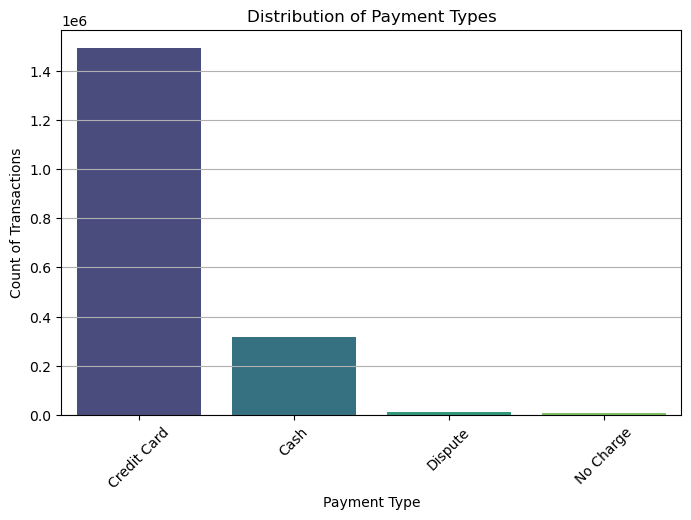

In [131]:
# Analyse the distribution of different payment types (payment_type).
payment_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute"
}
df['payment_type'] = df['payment_type'].map(payment_mapping)
payment_counts = df['payment_type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")
plt.xlabel("Payment Type")
plt.ylabel("Count of Transactions")
plt.title("Distribution of Payment Types")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

In [133]:
pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ----------- ---------------------------- 4.7/16.2 MB 23.7 MB/s eta 0:00:01
   ------------------------ --------------- 9.7/16.2 MB 24.1 MB/s eta 0:00:01
   --------------------------------- ------ 13.6/16.2 MB 22.5 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 20.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   --------------------------------- ------ 5.2/6.3 MB 26.5 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 22.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 18.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [175]:
import geopandas as gpd
# Read the shapefile using geopandas
zones = gpd.read_file("../TaxiZones/taxi_zones.shp")
zones.head()

Current Working Directory: C:\Users\User\data


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

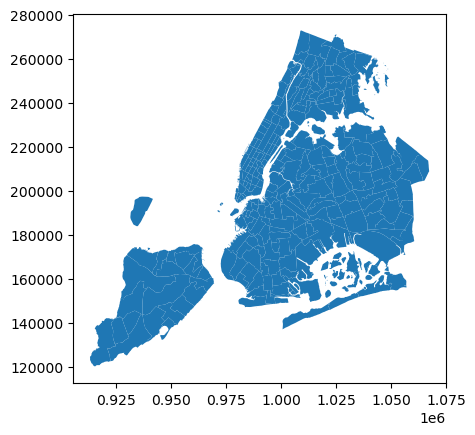

In [177]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [181]:
# Merge zones and trip records using locationID and PULocationID
trip_data = df.merge(zones[['LocationID', 'zone', 'borough']], 
                            left_on='DOLocationID', right_on='LocationID', 
                            how='left', suffixes=('', '_dropoff'))

trip_data.rename(columns={'zone': 'dropoff_zone', 'borough': 'dropoff_borough'}, inplace=True)
trip_data.drop(columns=['LocationID'], inplace=True)


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [183]:
# Group data by location and calculate the number of trips
pickup_counts = trip_data.groupby('PULocationID').size().reset_index(name='total_pickups')
dropoff_counts = trip_data.groupby('DOLocationID').size().reset_index(name='total_dropoffs')
location_counts = pickup_counts.merge(dropoff_counts, 
                                      left_on='PULocationID', 
                                      right_on='DOLocationID', 
                                      how='outer').fillna(0)
location_counts.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
location_counts['total_trips'] = location_counts['total_pickups'] + location_counts['total_dropoffs']
location_counts.drop(columns=['DOLocationID'], inplace=True)
location_counts = location_counts.sort_values(by='total_trips', ascending=False)
location_counts.head(10)


LocationID  total_pickups  total_dropoffs  total_trips
233       237.0        86798.0         77896.0     164694.0
232       236.0        77255.0         81366.0     158621.0
157       161.0        85791.0         71724.0     157515.0
128       132.0        97690.0         21474.0     119164.0
158       162.0        66632.0         52345.0     118977.0
226       230.0        61166.0         56564.0     117730.0
138       142.0        60987.0         51467.0     112454.0
166       170.0        54311.0         54662.0     108973.0
182       186.0        63754.0         40144.0     103898.0
235       239.0        50233.0         51036.0     101269.0

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

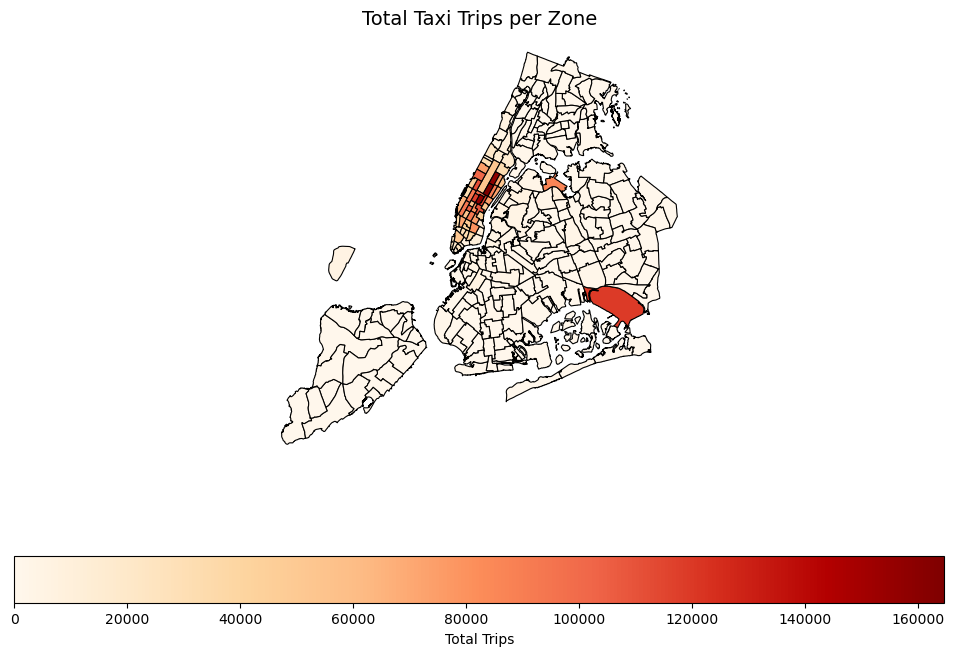

In [185]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(location_counts[['LocationID', 'total_trips']], 
                    left_on='LocationID', right_on='LocationID', 
                    how='left')
zones['total_trips'] = zones['total_trips'].fillna(0)
fig, ax = plt.subplots(figsize=(12, 8))
zones.plot(column='total_trips', cmap='OrRd', linewidth=0.8, edgecolor='black', 
           legend=True, legend_kwds={'label': "Total Trips", 'orientation': "horizontal"}, ax=ax)
ax.set_title("Total Taxi Trips per Zone", fontsize=14)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
plt.show()


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

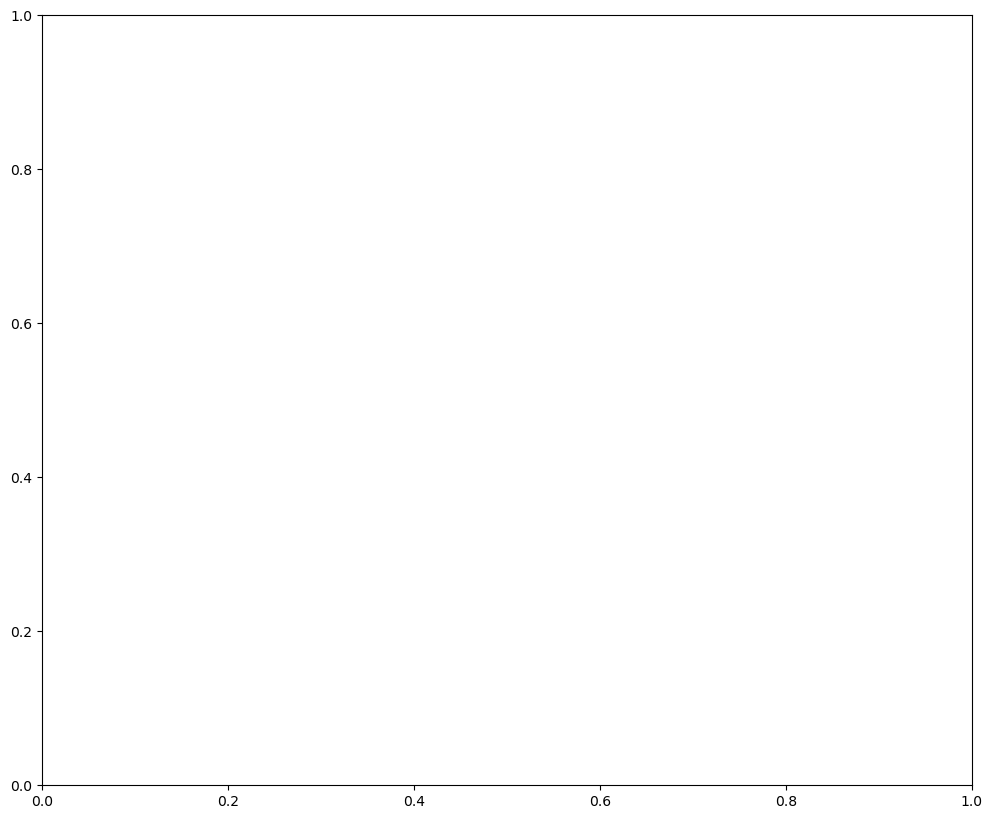

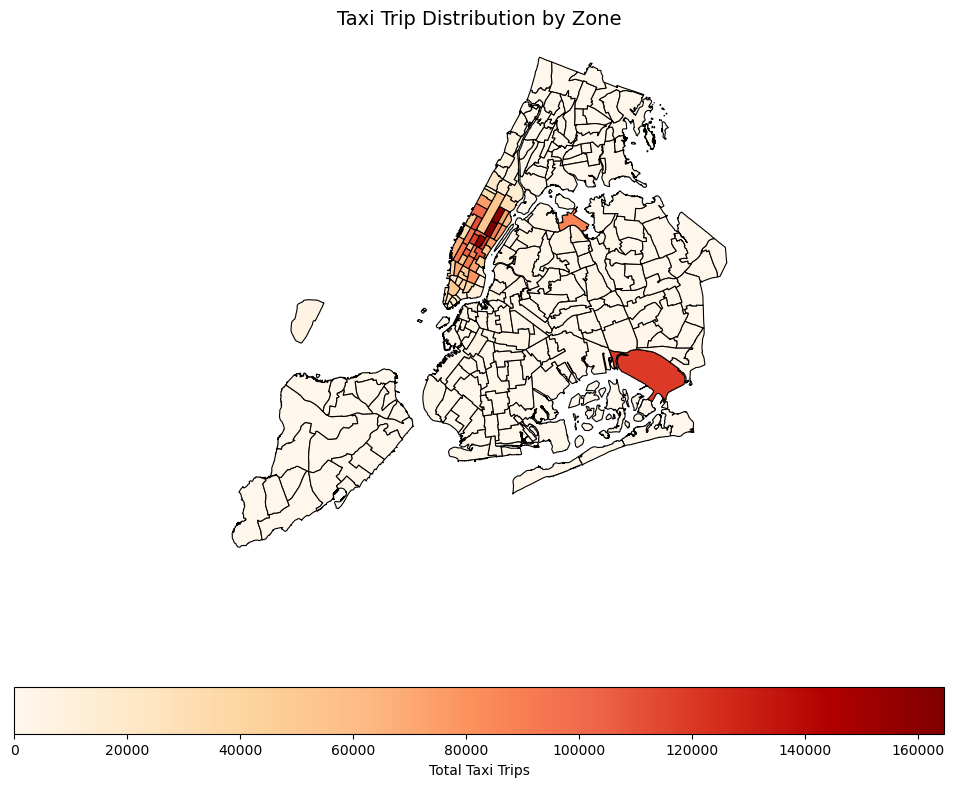

In [187]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones.plot(
    column="total_trips",  # Data column for coloring
    cmap="OrRd",  # Color scheme (Orange-Red)
    linewidth=0.8,  # Outline width
    edgecolor="black",  # Zone borders
    ax=ax,  # Axis to plot on
    legend=True,  # Show legend
    legend_kwds={"label": "Total Taxi Trips", "orientation": "horizontal"}  # Legend settings
)

ax.set_title("Taxi Trip Distribution by Zone", fontsize=14)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
plt.show()

In [ ]:
# can you try displaying the zones DF sorted by the number of trips?



Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [135]:
# Find routes which have the slowest speeds at different times of the day

df['trip_duration_hours'] = (pd.to_datetime(df['tpep_dropoff_datetime']) - pd.to_datetime(df['tpep_pickup_datetime'])).dt.total_seconds() / 3600
df_valid = df[(df['trip_distance'] > 0) & (df['trip_duration_hours'] > 0)]
df_valid['speed_mph'] = df_valid['trip_distance'] / df_valid['trip_duration_hours']
df_valid['hour_of_day'] = pd.to_datetime(df_valid['tpep_pickup_datetime']).dt.hour
df_valid['time_of_day'] = pd.cut(df_valid['hour_of_day'], 
                                 bins=[0, 6, 12, 18, 24], 
                                 labels=['Night', 'Morning', 'Afternoon', 'Evening'], 
                                 right=False)
slowest_routes = df_valid.groupby(['time_of_day', 'PULocationID', 'DOLocationID'])['speed_mph'].mean().reset_index()
slowest_routes = slowest_routes.sort_values(['time_of_day', 'speed_mph']).groupby('time_of_day').first()
print(slowest_routes[['PULocationID', 'DOLocationID', 'speed_mph']])

             PULocationID  DOLocationID  speed_mph
time_of_day                                       
Night                 113           193   0.069888
Morning               264           130   0.089664
Afternoon              88           205   0.057425
Evening                82            43   0.006324


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

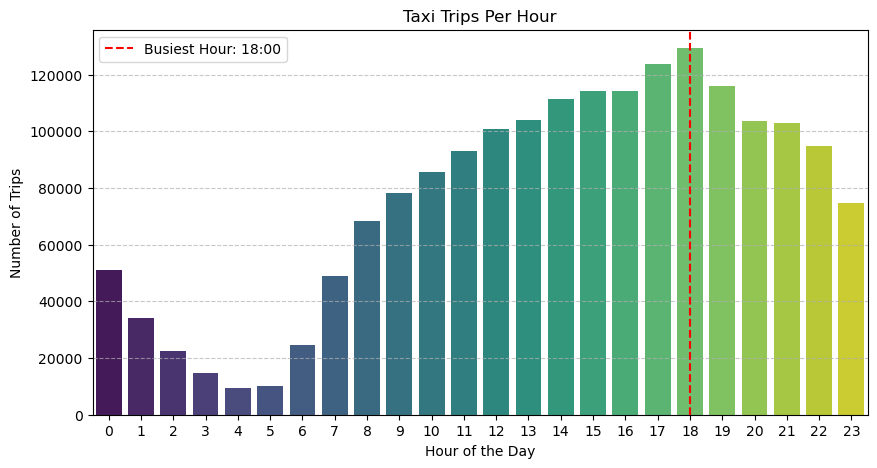

🟢 The busiest hour is 18:00 with 129379 trips.


In [137]:
# Visualise the number of trips per hour and find the busiest hour
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
trips_per_hour = df['pickup_hour'].value_counts().sort_index()
busiest_hour = trips_per_hour.idxmax()
max_trips = trips_per_hour.max()
plt.figure(figsize=(10, 5))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette="viridis")
plt.axvline(x=busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour}:00')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Taxi Trips Per Hour")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
print(f"🟢 The busiest hour is {busiest_hour}:00 with {max_trips} trips.")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [139]:
# Scale up the number of trips
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
# Count trips per hour
trips_per_hour = df['pickup_hour'].value_counts().sort_values(ascending=False)
# Get the top 5 busiest hours
top_5_hours = trips_per_hour.head(5)
# Display results
print("🚖 Top 5 Busiest Hours and Their Trip Counts:")
print(top_5_hours)



🚖 Top 5 Busiest Hours and Their Trip Counts:
pickup_hour
18    129379
17    123797
19    115926
15    114314
16    114302
Name: count, dtype: int64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

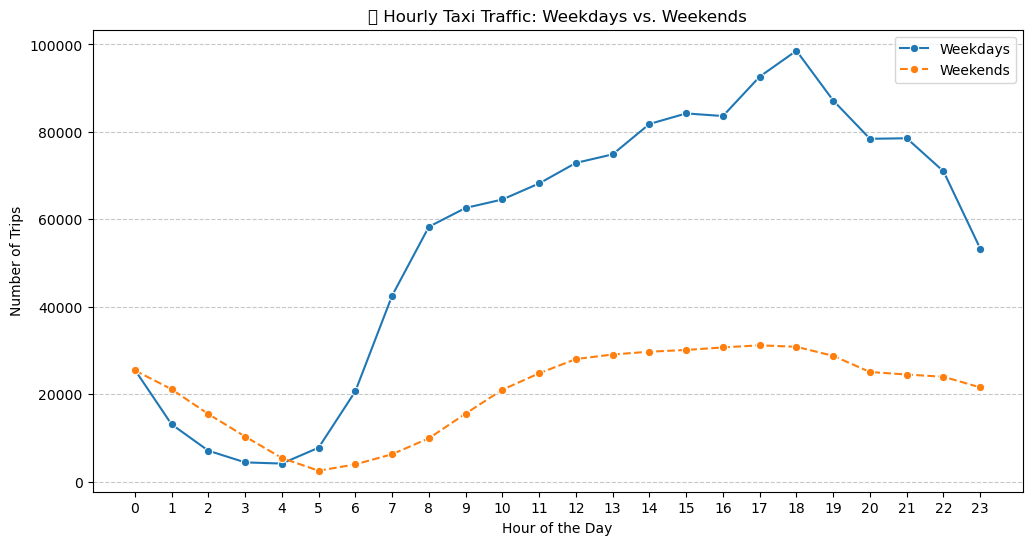

In [145]:
# Compare traffic trends for the week days and weekends
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract hour and day of the week
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek  # 0=Monday, 6=Sunday

# Separate weekday and weekend data
weekday_df = df[df['pickup_day'] < 5]  # Monday-Friday
weekend_df = df[df['pickup_day'] >= 5]  # Saturday-Sunday

# Count trips per hour for weekdays and weekends
weekday_hourly = weekday_df.groupby('pickup_hour').size()
weekend_hourly = weekend_df.groupby('pickup_hour').size()
plt.figure(figsize=(12, 6))

# Plot weekday traffic
sns.lineplot(x=weekday_hourly.index, y=weekday_hourly.values, label="Weekdays", marker="o")

# Plot weekend traffic
sns.lineplot(x=weekend_hourly.index, y=weekend_hourly.values, label="Weekends", marker="o", linestyle="dashed")

# Labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("📊 Hourly Taxi Traffic: Weekdays vs. Weekends")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

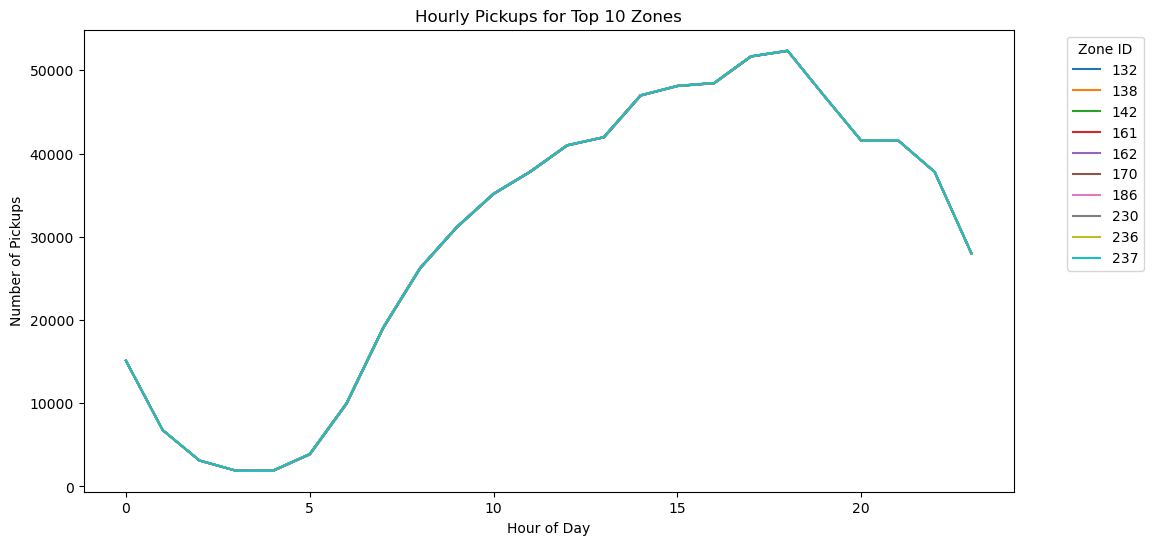

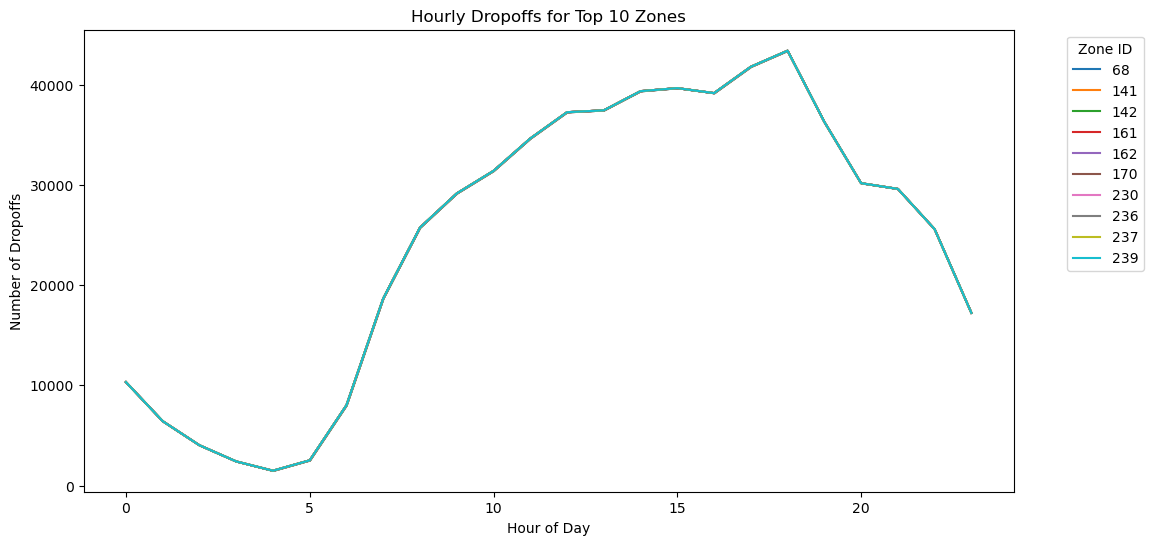

In [195]:
top_pickup_zones = trip_data.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='pickup_count')
top_dropoff_zones = trip_data.groupby(['DOLocationID', 'pickup_hour']).size().reset_index(name='dropoff_count')
top_10_pickups = top_pickup_zones.groupby("PULocationID")['pickup_count'].sum().nlargest(10).reset_index()
top_10_dropoffs = top_dropoff_zones.groupby("DOLocationID")['dropoff_count'].sum().nlargest(10).reset_index()
top_10_pickups = top_10_pickups.merge(zones, left_on="PULocationID", right_on="LocationID")
top_10_dropoffs = top_10_dropoffs.merge(zones, left_on="DOLocationID", right_on="LocationID")
top_pickup_data = trip_data[trip_data['PULocationID'].isin(top_10_pickups['PULocationID'])]
top_dropoff_data = trip_data[trip_data['DOLocationID'].isin(top_10_dropoffs['DOLocationID'])]
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_pickup_data, x="pickup_hour", y=top_pickup_data.groupby("pickup_hour")["PULocationID"].transform('count'), hue="PULocationID", palette="tab10")
plt.title("Hourly Pickups for Top 10 Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.legend(title="Zone ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_dropoff_data, x="pickup_hour", y=top_dropoff_data.groupby("pickup_hour")["DOLocationID"].transform('count'), hue="DOLocationID", palette="tab10")
plt.title("Hourly Dropoffs for Top 10 Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Dropoffs")
plt.legend(title="Zone ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [197]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = trip_data.groupby("PULocationID").size().reset_index(name="pickup_count")
dropoff_counts = trip_data.groupby("DOLocationID").size().reset_index(name="dropoff_count")
zone_ratios = pickup_counts.merge(dropoff_counts, left_on="PULocationID", right_on="DOLocationID", how="outer").fillna(0)
zone_ratios["pickup_drop_ratio"] = zone_ratios["pickup_count"] / (zone_ratios["dropoff_count"] + 1e-6) 
zone_ratios = zone_ratios.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")
top_10_highest = zone_ratios.nlargest(10, "pickup_drop_ratio")[["zone", "pickup_drop_ratio"]]
top_10_lowest = zone_ratios.nsmallest(10, "pickup_drop_ratio")[["zone", "pickup_drop_ratio"]]
print("Top 10 Highest Pickup/Dropoff Ratios:")
print(top_10_highest)

print("Top 10 Lowest Pickup/Dropoff Ratios:")
print(top_10_lowest)

Top 10 Highest Pickup/Dropoff Ratios:
                             zone  pickup_drop_ratio
196                 Rikers Island       2.000000e+06
70                  East Elmhurst       8.044061e+00
129                   JFK Airport       4.549222e+00
135             LaGuardia Airport       2.880701e+00
183  Penn Station/Madison Sq West       1.588133e+00
111       Greenwich Village South       1.394387e+00
42                   Central Park       1.363193e+00
246                  West Village       1.316047e+00
4                   Arden Heights       1.300000e+00
159                  Midtown East       1.272939e+00
Top 10 Lowest Pickup/Dropoff Ratios:
    zone  pickup_drop_ratio
26   NaN           0.000000
59   NaN           0.000000
84   NaN           0.000000
99   NaN           0.000000
103  NaN           0.000000
108  NaN           0.000000
153  NaN           0.000000
173  NaN           0.000000
184  NaN           0.000000
57   NaN           0.022727


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [199]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

trip_data["pickup_hour"] = pd.to_datetime(trip_data["tpep_pickup_datetime"]).dt.hour
night_trips = trip_data[(trip_data["pickup_hour"] >= 23) | (trip_data["pickup_hour"] <= 5)]
night_pickups = night_trips.groupby("PULocationID").size().reset_index(name="night_pickup_count")
night_dropoffs = night_trips.groupby("DOLocationID").size().reset_index(name="night_dropoff_count")
night_traffic = night_pickups.merge(night_dropoffs, left_on="PULocationID", right_on="DOLocationID", how="outer").fillna(0)
night_traffic = night_traffic.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")
top_10_night_pickups = night_traffic.nlargest(10, "night_pickup_count")[["zone", "night_pickup_count"]]
top_10_night_dropoffs = night_traffic.nlargest(10, "night_dropoff_count")[["zone", "night_dropoff_count"]]
print("\n🔹 Top 10 Zones for Nighttime Pickups (11PM-5AM):")
print(top_10_night_pickups)
print("\n🔹 Top 10 Zones for Nighttime Dropoffs (11PM-5AM):")
print(top_10_night_dropoffs)




🔹 Top 10 Zones for Nighttime Pickups (11PM-5AM):
                             zone  night_pickup_count
78                   East Village             15535.0
127                   JFK Airport             14759.0
241                  West Village             12522.0
46                   Clinton East             10300.0
143               Lower East Side              9830.0
109       Greenwich Village South              8672.0
222     Times Sq/Theatre District              8170.0
179  Penn Station/Madison Sq West              7044.0
159                 Midtown South              6152.0
133             LaGuardia Airport              6129.0

🔹 Top 10 Zones for Nighttime Dropoffs (11PM-5AM):
                              zone  night_dropoff_count
78                    East Village               8390.0
46                    Clinton East               7054.0
165                    Murray Hill               6420.0
67                    East Chelsea               5731.0
103                      

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

🌙 Nighttime Revenue Share (11 PM - 5 AM): 12.13%
☀️ Daytime Revenue Share (5 AM - 11 PM): 87.87%


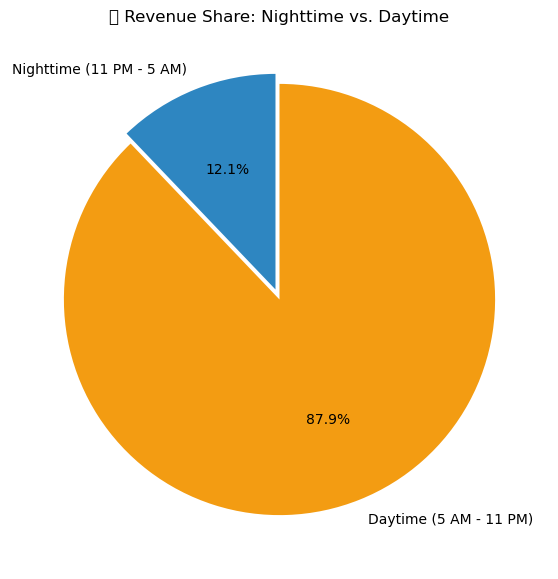

In [149]:
# Filter for night hours (11 PM to 5 AM)

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Define night and day time
night_hours = list(range(23, 24)) + list(range(0, 6))  # 11 PM - 5 AM
day_hours = list(range(6, 23))  # 6 AM - 10 PM

# Split revenue by time
night_revenue = df[df['pickup_hour'].isin(night_hours)]['total_amount'].sum()
day_revenue = df[df['pickup_hour'].isin(day_hours)]['total_amount'].sum()

# Calculate proportions
total_revenue = night_revenue + day_revenue
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

# Print results
print(f"🌙 Nighttime Revenue Share (11 PM - 5 AM): {night_share:.2f}%")
print(f"☀️ Daytime Revenue Share (5 AM - 11 PM): {day_share:.2f}%")
labels = ["Nighttime (11 PM - 5 AM)", "Daytime (5 AM - 11 PM)"]
values = [night_share, day_share]

# Create Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(values, labels=labels, autopct="%1.1f%%", colors=["#2E86C1", "#F39C12"], startangle=90, explode=[0.05, 0])

# Title
plt.title("🕰️ Revenue Share: Nighttime vs. Daytime")

# Show plot
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [151]:
# Analyse the fare per mile per passenger for different passenger counts
df_filtered = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)]
df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']
df_filtered['fare_per_mile_per_passenger'] = df_filtered['fare_per_mile'] / df_filtered['passenger_count']
fare_per_passenger_summary = df_filtered.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
print(fare_per_passenger_summary)



   passenger_count  fare_per_mile_per_passenger
0              1.0                    10.984898
1              2.0                     6.734356
2              3.0                     4.096465
3              4.0                     4.613798
4              5.0                     1.730016
5              6.0                     1.464437


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [153]:
# Compare the average fare per mile for different days and for different times of the day

import pandas as pd
df_filtered = df[df['trip_distance'] > 0].copy()
df_filtered['pickup_hour'] = df_filtered['tpep_pickup_datetime'].dt.hour
df_filtered['pickup_day'] = df_filtered['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']
fare_by_hour = df_filtered.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()
fare_by_day = df_filtered.groupby('pickup_day')['fare_per_mile'].mean().reset_index()
day_mapping = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
fare_by_day['pickup_day'] = fare_by_day['pickup_day'].map(day_mapping)
print("📊 Average Fare Per Mile by Hour:")
print(fare_by_hour)
print("\n📆 Average Fare Per Mile by Day of the Week:")
print(fare_by_day)


📊 Average Fare Per Mile by Hour:
    pickup_hour  fare_per_mile
0             0       9.947557
1             1      10.197401
2             2      11.024353
3             3      12.498442
4             4      17.987948
5             5      14.705482
6             6      10.565171
7             7       9.769064
8             8       9.985722
9             9      10.832327
10           10      11.315968
11           11      11.226496
12           12      11.743239
13           13      11.763899
14           14      12.030523
15           15      13.027004
16           16      13.346587
17           17      12.156524
18           18      11.755938
19           19      11.569896
20           20      10.476756
21           21      10.574602
22           22      10.817969
23           23      11.669736

📆 Average Fare Per Mile by Day of the Week:
  pickup_day  fare_per_mile
0     Monday      11.520935
1    Tuesday      11.267093
2  Wednesday      11.300934
3   Thursday      11.636551
4     F

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [155]:
# Compare fare per mile for different vendors
df_filtered = df[df['trip_distance'] > 0].copy()
df_filtered['pickup_hour'] = df_filtered['tpep_pickup_datetime'].dt.hour
df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']
fare_by_vendor_hour = df_filtered.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()
print("📊 Average Fare Per Mile by Vendor & Hour:")
print(fare_by_vendor_hour.head())


📊 Average Fare Per Mile by Vendor & Hour:
   VendorID  pickup_hour  fare_per_mile
0         1            0       6.802994
1         1            1       6.742194
2         1            2       6.952001
3         1            3       6.720959
4         1            4       8.609141


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


📊 Average Fare Per Mile by Vendor & Distance Category:
   VendorID   distance_category  fare_per_mile
0         1     Long (>5 miles)       4.417891
1         1  Medium (2-5 miles)       6.387864
2         1    Short (≤2 miles)       9.998441
3         2     Long (>5 miles)       4.502504
4         2  Medium (2-5 miles)       6.550721
5         2    Short (≤2 miles)      18.449162


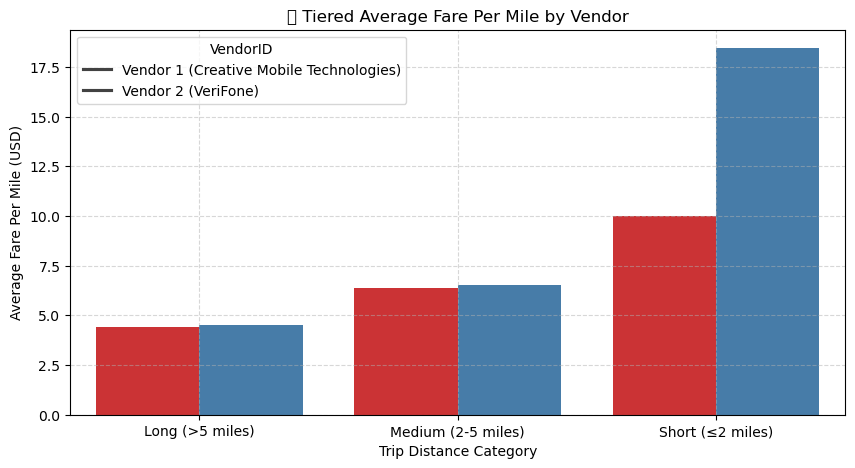

In [159]:
# Defining distance tiers
# Ensure trip_distance > 0 to avoid division errors
df_filtered = df[df['trip_distance'] > 0].copy()
df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']
def categorize_distance(distance):
    if distance <= 2:
        return "Short (≤2 miles)"
    elif 2 < distance <= 5:
        return "Medium (2-5 miles)"
    else:
        return "Long (>5 miles)"
df_filtered['distance_category'] = df_filtered['trip_distance'].apply(categorize_distance)
fare_by_vendor_distance = df_filtered.groupby(['VendorID', 'distance_category'])['fare_per_mile'].mean().reset_index()
print("📊 Average Fare Per Mile by Vendor & Distance Category:")
print(fare_by_vendor_distance)
plt.figure(figsize=(10, 5))
sns.barplot(x="distance_category", y="fare_per_mile", hue="VendorID", data=fare_by_vendor_distance, palette="Set1")
plt.title("📊 Tiered Average Fare Per Mile by Vendor")
plt.xlabel("Trip Distance Category")
plt.ylabel("Average Fare Per Mile (USD)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="VendorID", labels=["Vendor 1 (Creative Mobile Technologies)", "Vendor 2 (VeriFone)"])
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

📊 Average Tip Percentage by Trip Distance:
distance_category
Short (≤2 miles)         22.459088
Medium (2-5 miles)       18.746605
Long (5-10 miles)        17.275443
Very Long (>10 miles)    18.779553
Name: tip_percentage, dtype: float64

📊 Average Tip Percentage by Passenger Count:
passenger_count
1.0    22.374821
2.0    19.754514
3.0    19.193720
4.0    47.914092
5.0    20.754659
6.0    20.680305
Name: tip_percentage, dtype: float64

📊 Average Tip Percentage by Time of Pickup:
pickup_period
Night (12AM-5AM)        23.764099
Morning (6AM-11AM)      19.455969
Afternoon (12PM-5PM)    22.665423
Evening (6PM-11PM)      23.579049
Name: tip_percentage, dtype: float64


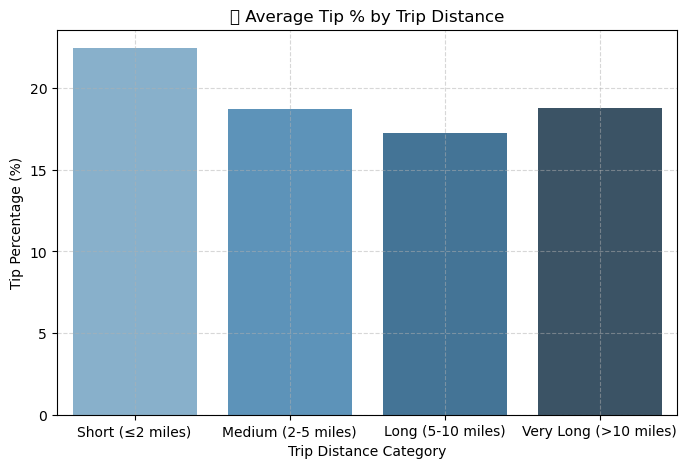

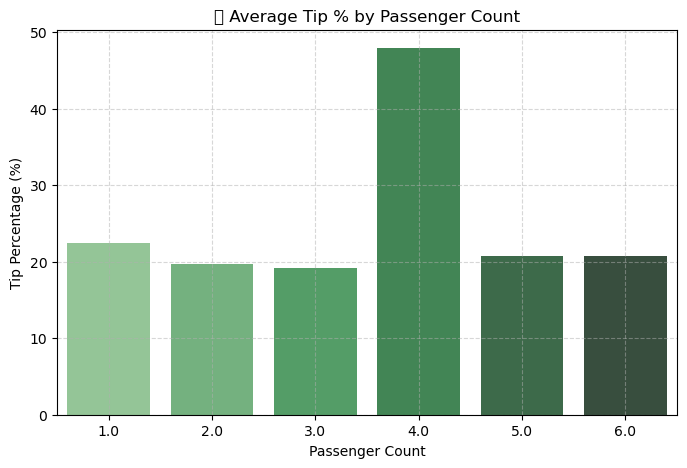

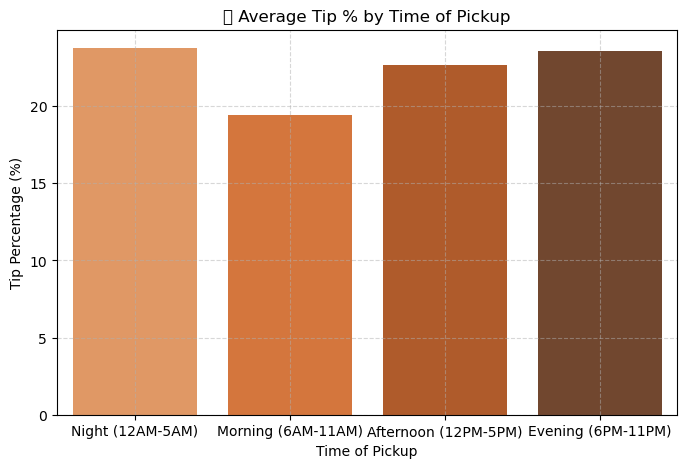

In [161]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df_filtered = df[df['fare_amount'] > 0].copy()
df_filtered['tip_percentage'] = (df_filtered['tip_amount'] / df_filtered['fare_amount']) * 100
df_filtered['distance_category'] = pd.cut(df_filtered['trip_distance'], bins=[0, 2, 5, 10, np.inf], 
                                          labels=['Short (≤2 miles)', 'Medium (2-5 miles)', 'Long (5-10 miles)', 'Very Long (>10 miles)'])
df_filtered['pickup_period'] = pd.cut(df_filtered['pickup_hour'], bins=[0, 5, 11, 17, 23], 
                                      labels=['Night (12AM-5AM)', 'Morning (6AM-11AM)', 'Afternoon (12PM-5PM)', 'Evening (6PM-11PM)'], include_lowest=True)
tip_by_distance = df_filtered.groupby('distance_category')['tip_percentage'].mean()
tip_by_passenger = df_filtered.groupby('passenger_count')['tip_percentage'].mean()
tip_by_time = df_filtered.groupby('pickup_period')['tip_percentage'].mean()
print("📊 Average Tip Percentage by Trip Distance:")
print(tip_by_distance)
print("\n📊 Average Tip Percentage by Passenger Count:")
print(tip_by_passenger)
print("\n📊 Average Tip Percentage by Time of Pickup:")
print(tip_by_time)
plt.figure(figsize=(8,5))
sns.barplot(x=tip_by_distance.index, y=tip_by_distance.values, palette="Blues_d")
plt.title("📊 Average Tip % by Trip Distance")
plt.xlabel("Trip Distance Category")
plt.ylabel("Tip Percentage (%)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
plt.figure(figsize=(8,5))
sns.barplot(x=tip_by_passenger.index, y=tip_by_passenger.values, palette="Greens_d")
plt.title("📊 Average Tip % by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Tip Percentage (%)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
plt.figure(figsize=(8,5))
sns.barplot(x=tip_by_time.index, y=tip_by_time.values, palette="Oranges_d")
plt.title("📊 Average Tip % by Time of Pickup")
plt.xlabel("Time of Pickup")
plt.ylabel("Tip Percentage (%)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

📊 Average Passenger Count by Hour:
pickup_hour
0     1.423535
1     1.446645
2     1.445051
3     1.440895
4     1.413395
5     1.288114
6     1.254634
7     1.277698
8     1.289418
9     1.314979
10    1.348608
11    1.369994
12    1.376001
13    1.389386
14    1.399128
15    1.407614
16    1.403930
17    1.393362
18    1.383045
19    1.395640
20    1.405192
21    1.423190
22    1.424590
23    1.424610
Name: passenger_count, dtype: float64

📊 Average Passenger Count by Day of the Week:
pickup_day
Monday       1.359458
Tuesday      1.332226
Wednesday    1.332952
Thursday     1.342615
Friday       1.400373
Saturday     1.480482
Sunday       1.465230
Name: passenger_count, dtype: float64


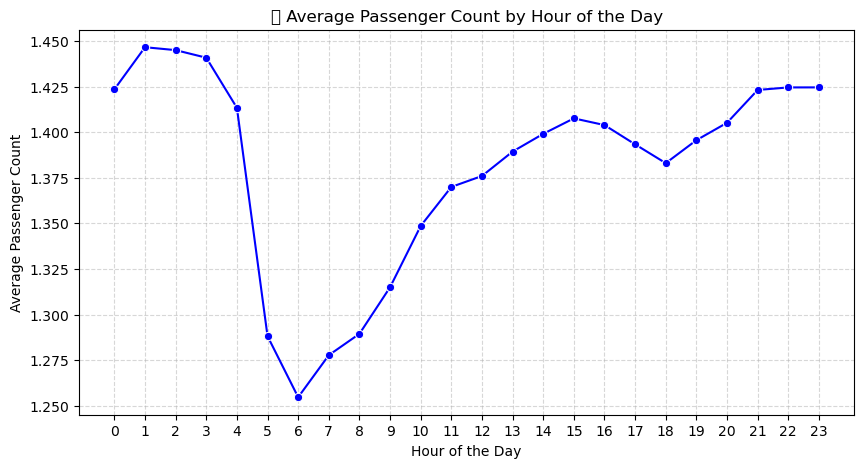

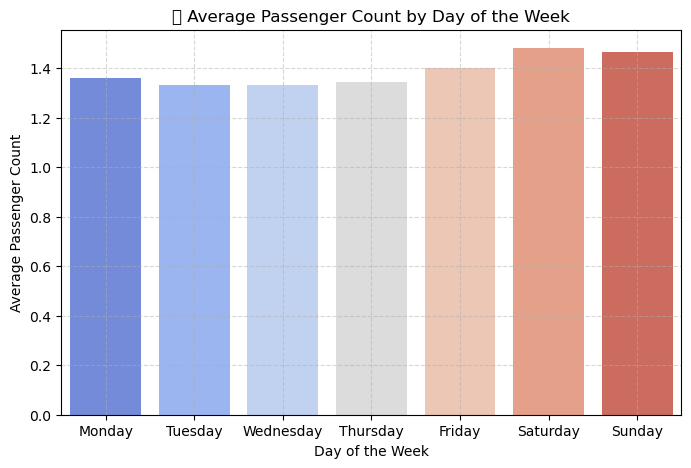

In [201]:
# See how passenger count varies across hours and days
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
passenger_by_hour = df.groupby('pickup_hour')['passenger_count'].mean()
passenger_by_day = df.groupby('pickup_day')['passenger_count'].mean()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
passenger_by_day = passenger_by_day.reindex(day_order)
print("📊 Average Passenger Count by Hour:")
print(passenger_by_hour)
print("\n📊 Average Passenger Count by Day of the Week:")
print(passenger_by_day)
plt.figure(figsize=(10,5))
sns.lineplot(x=passenger_by_hour.index, y=passenger_by_hour.values, marker='o', color='b')
plt.title("📊 Average Passenger Count by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Passenger Count")
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
plt.figure(figsize=(8,5))
sns.barplot(x=passenger_by_day.index, y=passenger_by_day.values, palette="coolwarm")
plt.title("📊 Average Passenger Count by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Passenger Count")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [203]:
# How does passenger count vary across zones
passenger_stats = trip_data.groupby("PULocationID").agg(
    avg_passenger_count=("passenger_count", "mean"),
    total_passenger_count=("passenger_count", "sum"),
    trip_count=("passenger_count", "count")
).reset_index()
passenger_stats = passenger_stats.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")
top_zones = passenger_stats.nlargest(10, "avg_passenger_count")[["zone", "avg_passenger_count", "trip_count"]]
bottom_zones = passenger_stats.nsmallest(10, "avg_passenger_count")[["zone", "avg_passenger_count", "trip_count"]]
print("\nTop 10 Zones with Highest Avg Passengers per Trip:")
print(top_zones)
print("\nBottom 10 Zones with Lowest Avg Passengers per Trip:")
print(bottom_zones)




Top 10 Zones with Highest Avg Passengers per Trip:
                             zone  avg_passenger_count  trip_count
5         Arrochar/Fort Wadsworth             2.040000          25
106           Grymes Hill/Clifton             2.000000           1
11                   Battery Park             1.801956         818
0                  Newark Airport             1.780000         250
183                      Red Hook             1.715789         190
32             Brooklyn Navy Yard             1.640000          25
64             DUMBO/Vinegar Hill             1.613272         437
93      Forest Park/Highland Park             1.600000           5
90   Flushing Meadows-Corona Park             1.579602         402
249            World Trade Center             1.548929        9524

Bottom 10 Zones with Lowest Avg Passengers per Trip:
                       zone  avg_passenger_count  trip_count
1               Jamaica Bay                  1.0           2
2   Allerton/Pelham Gardens        

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

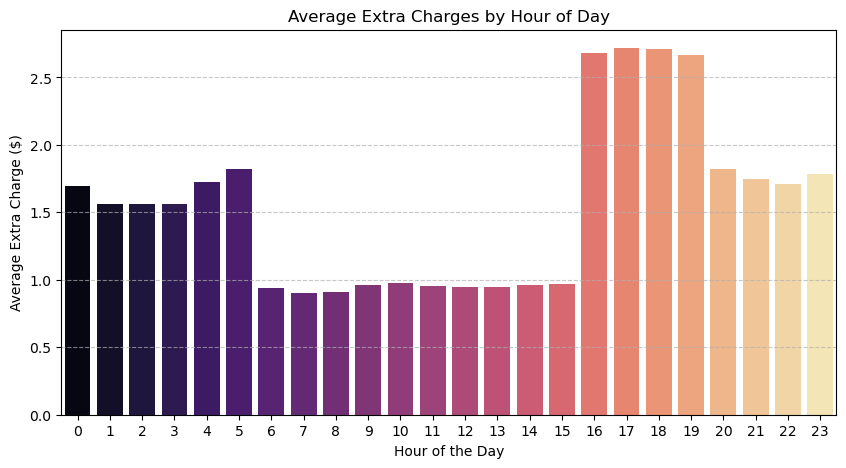

In [141]:
# How often is each surcharge applied?
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
extra_per_hour = df.groupby('pickup_hour')['extra'].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=extra_per_hour.index, y=extra_per_hour.values, palette="magma")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Extra Charge ($)")
plt.title("Average Extra Charges by Hour of Day")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
4.1.1.1.	Boost fleet in business and residential areas during weekday peak hours (7–9 AM, 4–7 PM).
4.1.1.2.	Balance fleet across leisure zones on weekends due to steady, flat demand.
4.1.1.3.	Prioritize high-trip zones (e.g., WTC, Newark Airport) with shared ride options to increase efficiency.
4.1.1.4.	Deprioritize low-trip zones like Country Club with on-demand dispatch instead of idle coverage.
4.1.1.5.	Route long trips (>10 miles) to maximize revenue during off-peak hours.
4.1.1.6.	Cluster short trips in dense zones to boost trip volume and tip returns.
4.1.1.7.	Deploy more vehicles during peak surcharge hours (4–7 PM) for higher profit per trip.
4.1.1.8.	Pool trips during low-surcharge hours (6 AM–3 PM) to optimize fleet usage.
4.1.1.9.	Match large groups (5 passengers) with experienced drivers for high-tip potential.
4.1.1.10.	Route solo riders efficiently in core areas to maximize short, high-tip trips.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
4.1.2.1.	Position cabs early (6–7 AM) in residential zones for morning commute demand.
4.1.2.2.	Shift fleet to commercial hubs like World Trade Center, Battery Park from 7–10 AM and 4–7 PM.
4.1.2.3.	On weekends, spread cabs near parks, malls, and tourist areas (e.g., Flushing Meadows) as traffic is steady all day.
4.1.2.4.	Near airports (e.g., Newark), ensure consistent cab availability due to high avg. passengers/trip.
4.1.2.5.	During mid-day (11 AM–3 PM), keep cabs in zones with long-trip potential for better margins.
4.1.2.6.	Deploy fewer cabs in low-demand zones (e.g., Country Club, Arden Heights), serve via dynamic dispatch.
4.1.2.7.	Prioritize high tip zones (≥5 passengers) with premium or experienced drivers.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
4.1.3.1.	Increase surcharges during peak hours (4–7 PM) where demand and willingness to pay are highest.
4.1.3.2.	Introduce distance-based tipping incentives—highlight high tip potential for very long (>10 mi) and short (<2 mi) trips.
4.1.3.3.	Apply dynamic pricing in high-demand zones like WTC, Newark Airport, and Battery Park.
4.1.3.4.	Reduce base fare during mid-day (11 AM–3 PM) to stimulate demand in low-surcharge windows.
4.1.3.5.	Offer group fare discounts in zones with high avg. passenger counts to boost volume.